In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Leitura dos arquivos CSV
df1 = pd.read_csv('1- producao-de-plastico-global.csv')
df2 = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')
df3 = pd.read_csv('3- destino-plastico.csv')
df4 = pd.read_csv('4- desperdicio-plastico-per-capita.csv')
df5 = pd.read_csv('5- poluicao-agua-cidades.csv')


In [4]:
# Exibir as primeiras linhas de cada arquivo
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

  Entidade   Ano  Produção Anual de Plástico
0    Mundo  1950                     2000000
1    Mundo  1951                     2000000
2    Mundo  1952                     2000000
3    Mundo  1953                     3000000
4    Mundo  1954                     3000000
              Entidade Código   Ano  \
0               Africa    NaN  2019   
1              Albania    ALB  2019   
2              Algeria    DZA  2019   
3               Angola    AGO  2019   
4  Antigua and Barbuda    ATG  2019   

   Participação na emissão global de plásticos para o oceano  
0                                           7.989317          
1                                           0.159782          
2                                           0.589510          
3                                           0.087804          
4                                           0.000204          
               Entidade  Código   Ano  \
0  Americas (excl. USA)     NaN  2000   
1  Americas (excl. USA)     NaN  20

In [7]:
df5.rename(columns={' Entidade': 'Entidade'}, inplace=True)
#querido professor, eu passei mais de duas horas da minha vida tentando entender o PQ não dava 
#pra usar 'Entidade" como chave primaria, você é mt maldoso de botar um espaço no nome da coluna beleza

In [8]:
# Merging datasets based on common columns
combined = df5.merge(df2, how='left', left_on='Entidade', right_on='Entidade')
combined = combined.merge(df3, how='left', left_on=['Entidade'], right_on=['Entidade'])
combined = combined.merge(df4, how='left', left_on=['Entidade'], right_on=['Entidade'])
combined = combined.merge(df1, how='left', left_on=['Entidade',], right_on=['Entidade'])

# Exibir as primeiras linhas do conjunto de dados combinado
print(combined.head())


             Cidade                Região                  Entidade  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3            Berlin                   NaN                   Germany   
4       Los Angeles            California  United States of America   

    Qualidade do Ar   Poluição da Água Código   Ano_x  \
0         46.816038          49.504950    NaN     NaN   
1         66.129032          49.107143    NaN     NaN   
2         60.514019          43.000000    NaN     NaN   
3         62.364130          28.612717    DEU  2019.0   
4         36.621622          61.299435    NaN     NaN   

   Participação na emissão global de plásticos para o oceano  Código_x  \
0                                                NaN               NaN   
1                                                NaN               NaN   
2       

In [23]:
combined.fillna(method='ffill', inplace=True)
combined.fillna(method='bfill', inplace=True)
combined.dropna(inplace=True)
print(combined.isnull().sum())


Cidade                                                              0
 Região                                                             0
Entidade                                                            0
 Qualidade do Ar                                                    0
 Poluição da Água                                                   0
Código                                                              0
Ano_x                                                               0
Participação na emissão global de plásticos para o oceano           0
 Código_x                                                           0
 Ano_x                                                              0
 Participação da reciclagem do lixo total regional                  0
 Participação da queima do lixo total regional                      0
 Participação do lixo descartado e mal gerido do total regional     0
 Participação do lixo encaminhado para aterros do total regional    0
 Código_y           

C:\Users\nimar\AppData\Local\Temp\ipykernel_17240\3240095318.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined.fillna(method='ffill', inplace=True)
C:\Users\nimar\AppData\Local\Temp\ipykernel_17240\3240095318.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined.fillna(method='bfill', inplace=True)


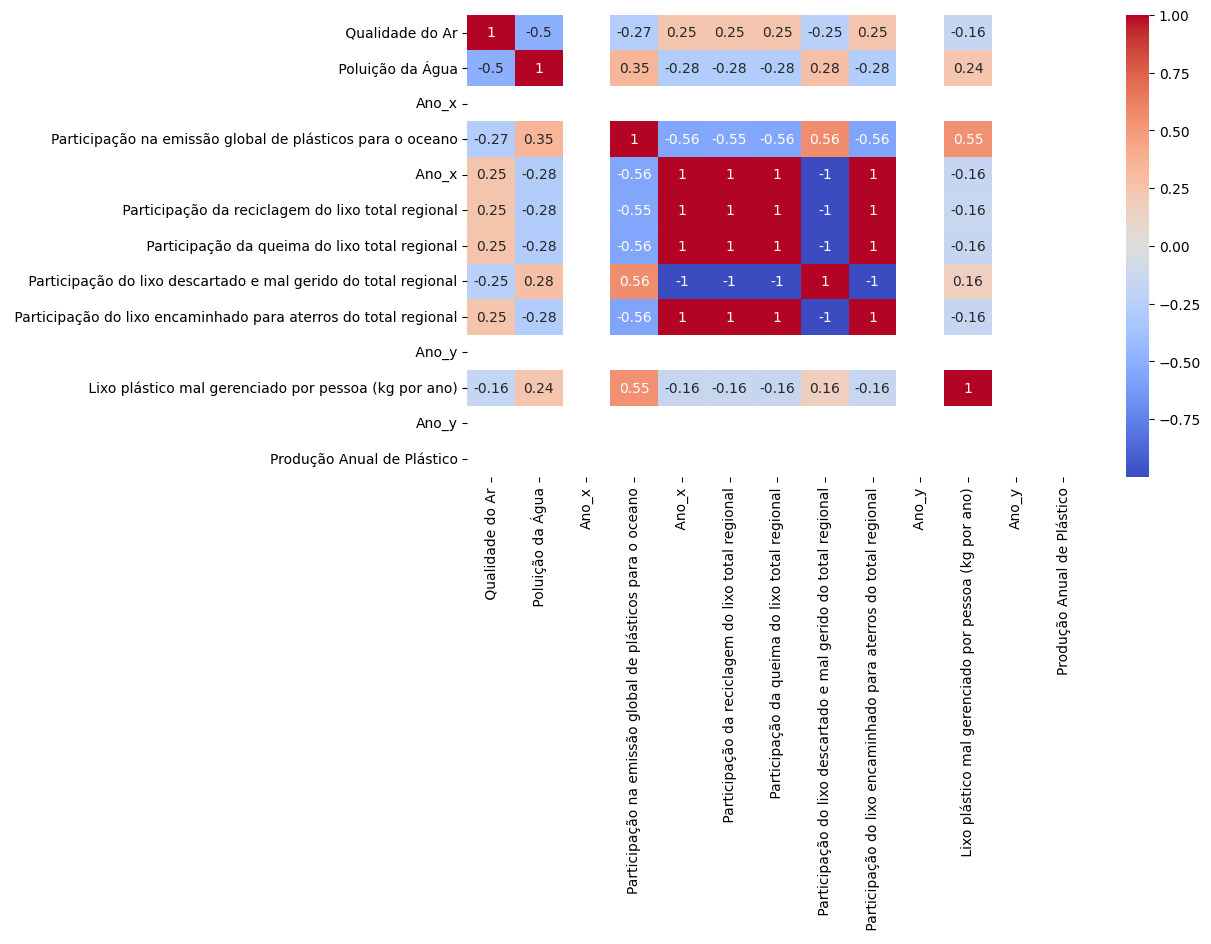

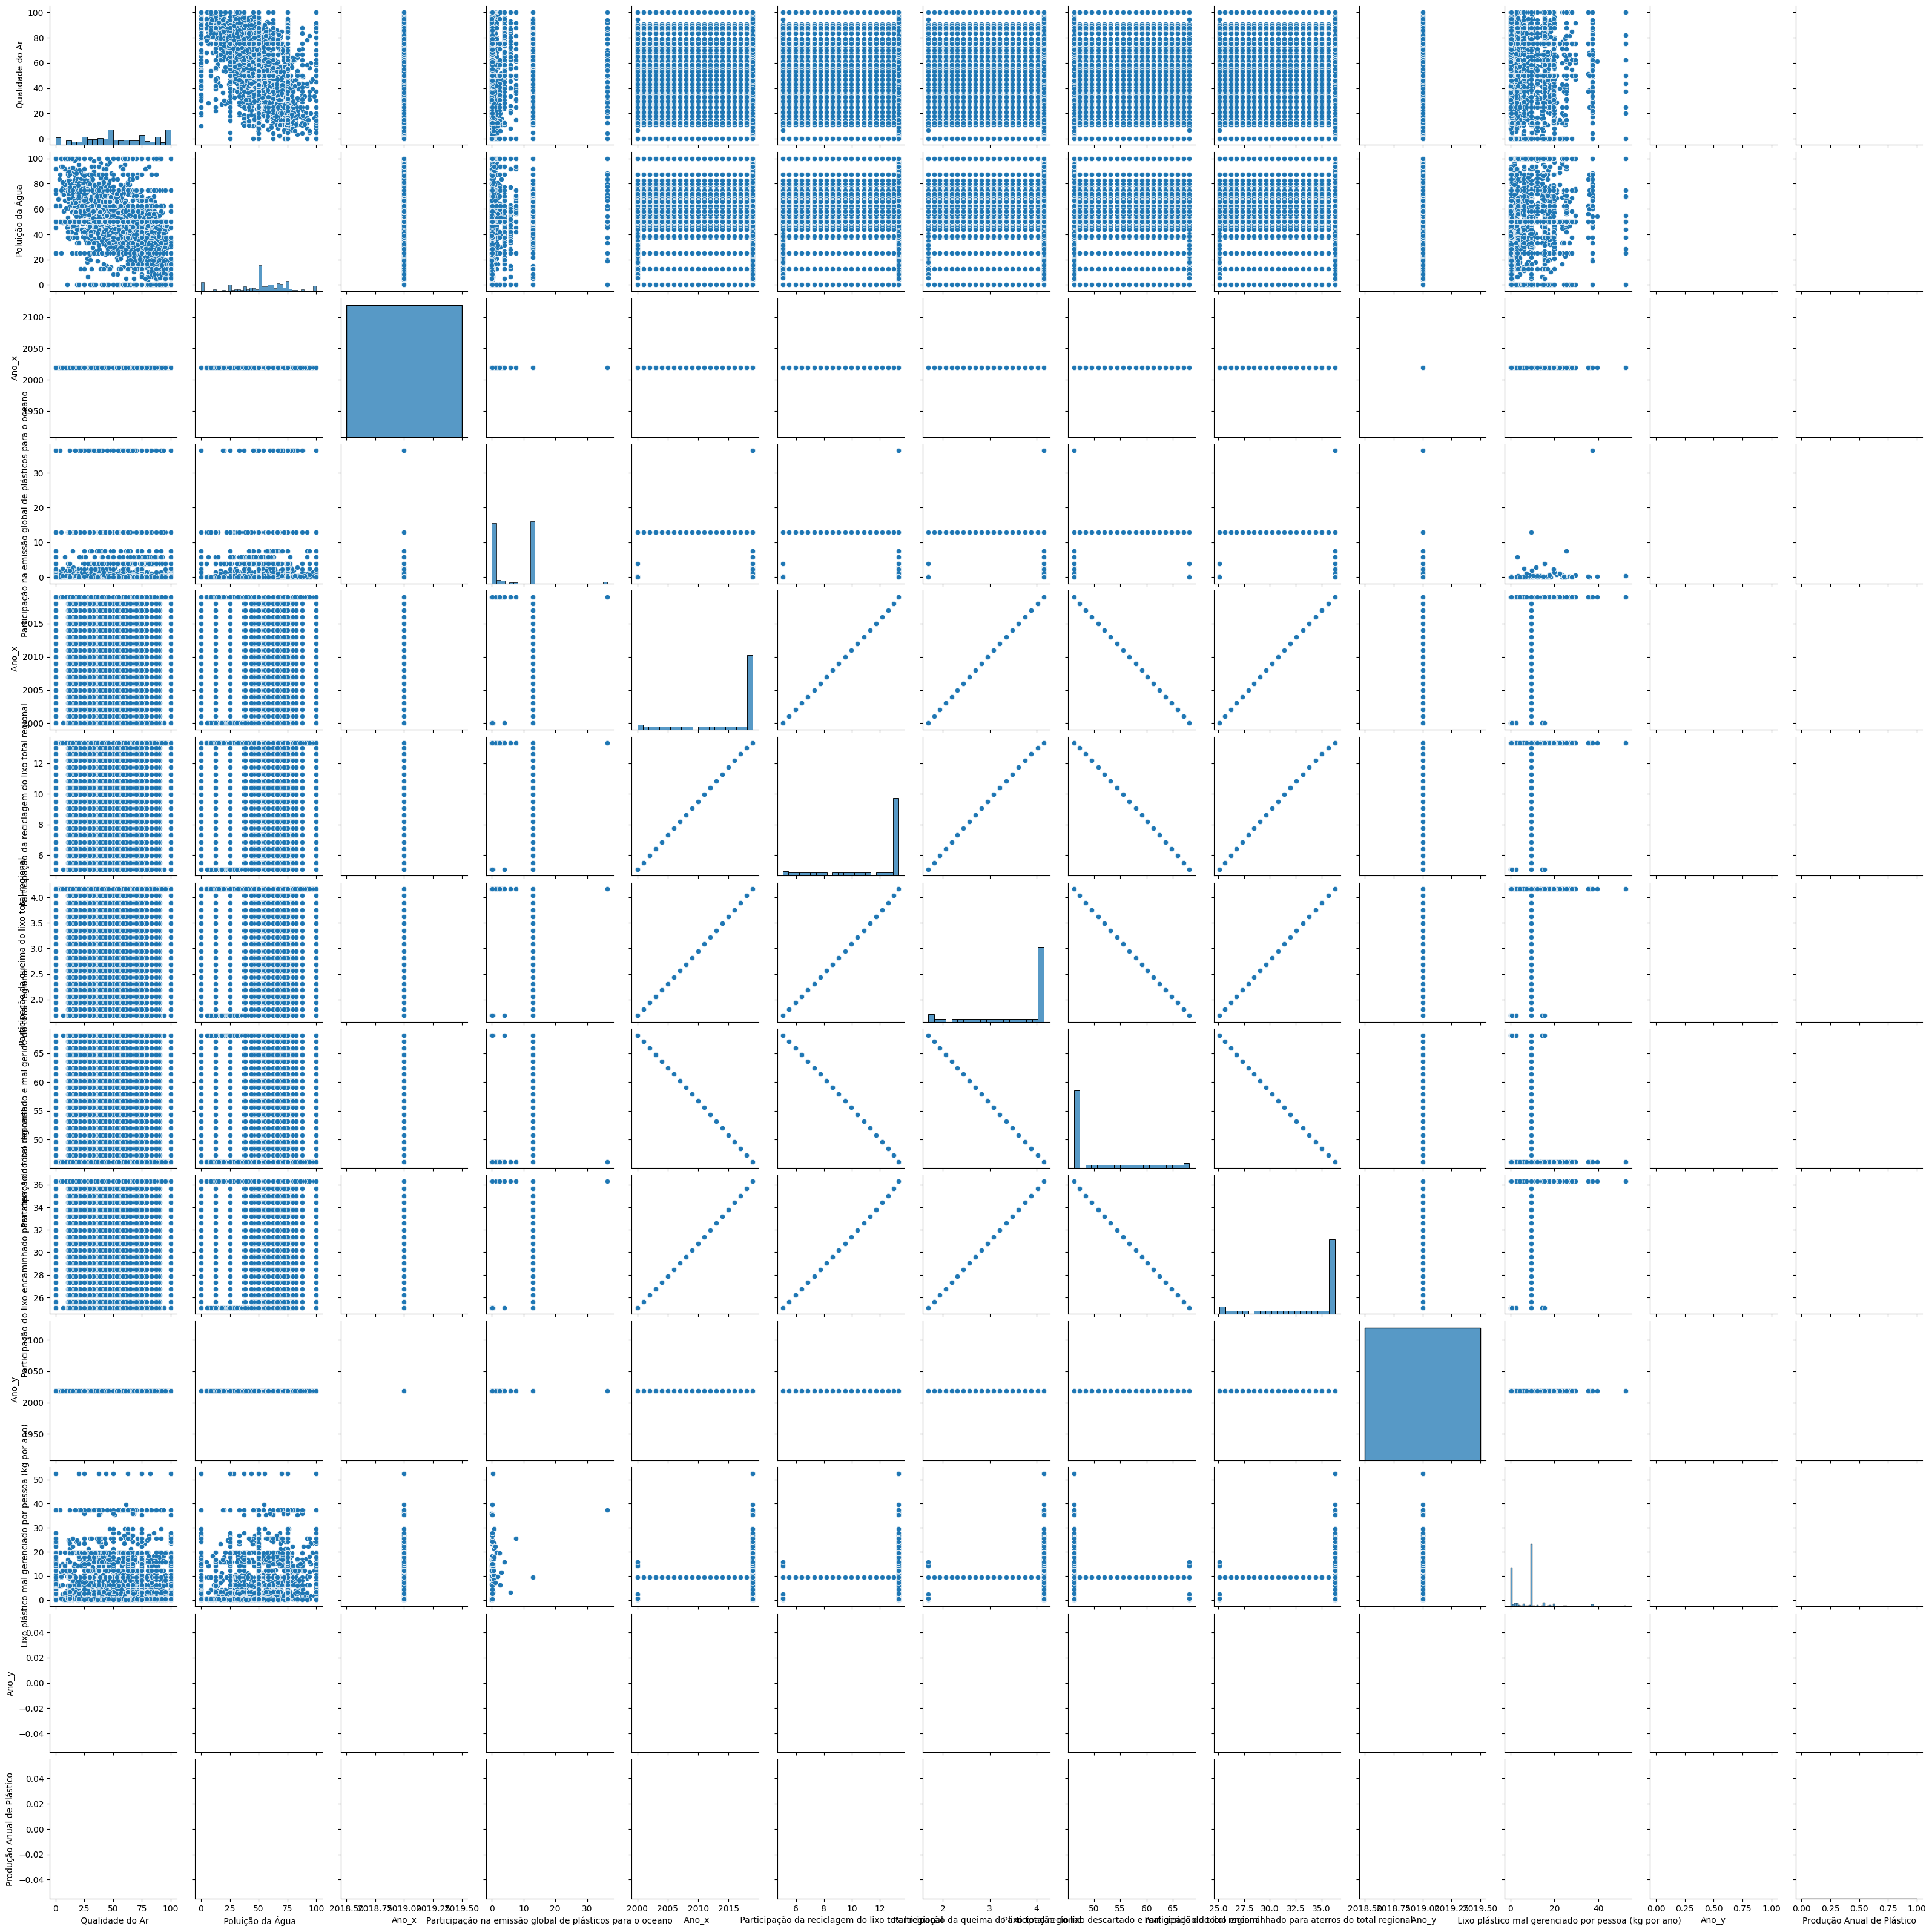

In [11]:
# Selecionar colunas numéricas
numeric_cols = combined.select_dtypes(include=['float64', 'int64']).columns

# Visualizar correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(combined[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot para visualização detalhada
sns.pairplot(combined[numeric_cols])
plt.show()
